# Project 4 - Concrete Strength Case Study

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [3]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline

# Impute and Encode
from sklearn.preprocessing import LabelEncoder
from impyute.imputation.cs import mice

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [210]:
df=pd.read_csv("compresive_strength_concrete_2.csv")

In [211]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [212]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"superplastic",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarseagg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fineagg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"strength"})

In [213]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [214]:
# Checking data types - Only numerical features
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [215]:
df.shape

(1030, 9)

#### Instructions: Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. 

### Check for duplicated values

In [216]:
df_dups = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
df_dups.shape

Duplicate Rows except first occurrence based on all columns are :


(25, 9)

In [218]:
# Remove duplicated rows
df = df.drop_duplicates(keep='last')

In [219]:
# Shape of dataframe after removal of duplicates
df.shape

(1005, 9)

In [220]:
#Checking for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


### Observations
The descriptive statistics:

- The dataset has only numerical data fields
- There are no missing values
- We can see that Cement and right skewed, 
- Slag, WAter are left skewed
- Age has a very wide range of values and with several outliers
- More insights further down with visualizing each of these features

## Exploratory Data Analysis

### Dependent Variable

Check the distribution of the dependent variable, and if natural log should be applied. As we can see, the original distribution is close to being normally distributed and we do not need to transform it.

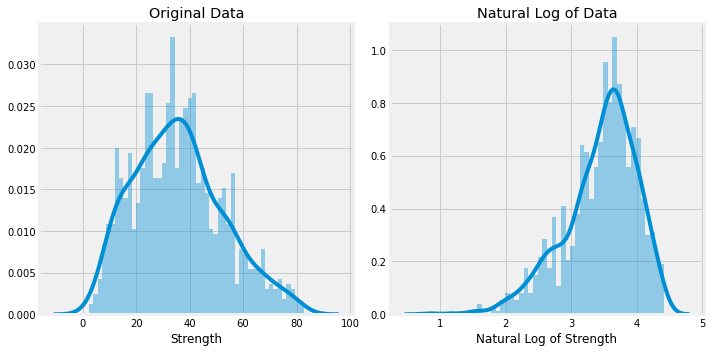

In [13]:
target = df[df.columns.values[-1]]
target_log = np.log(target)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(target, bins=50)
plt.title('Original Data')
plt.xlabel('Strength')

plt.subplot(1,2,2)
sns.distplot(target_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Strength')
plt.tight_layout()

### Visualize each feature with the dependent variable Strength 

In [9]:
features = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age']

In [16]:
# Function which receives each independent variable and creates regression and KDE plot

def Reg_visual(FeatureName,DependentVariable):
    cols = df.columns
    sns.set(font_scale=1)
    print('---------------------------------------------------------------')
    print('Visual Analysis of correlation for Feature : ' , FeatureName)
    sns.jointplot(data=df, x=FeatureName, y=DependentVariable, kind='reg',color='orangered')
    sns.jointplot(data=df, x=FeatureName, y=DependentVariable, kind='kde',color='orangered')

    plt.show()

---------------------------------------------------------------
Visual Analysis of correlation for Feature :  cement


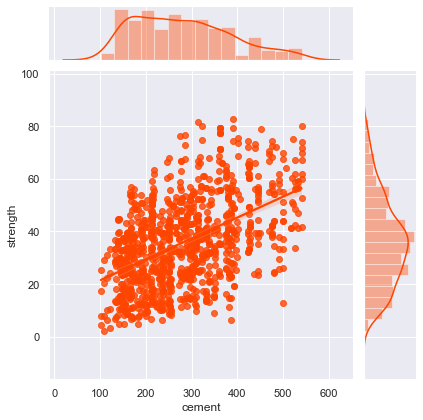

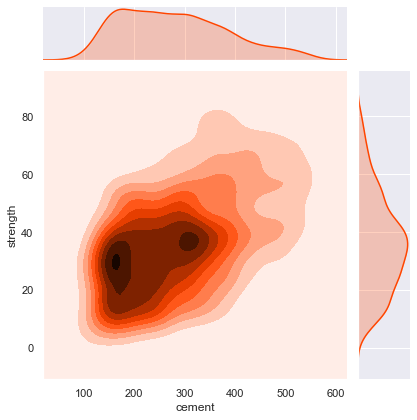

---------------------------------------------------------------
Visual Analysis of correlation for Feature :  slag


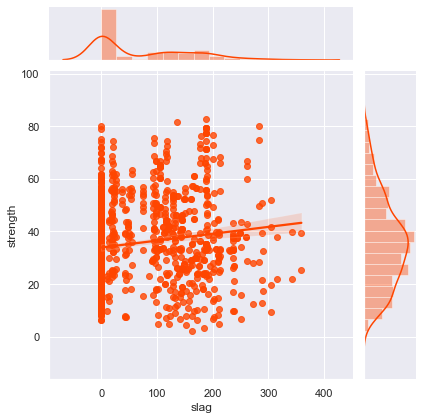

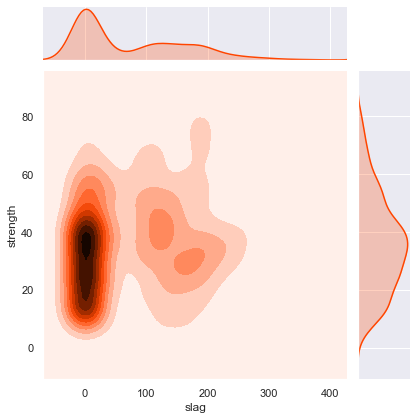

---------------------------------------------------------------
Visual Analysis of correlation for Feature :  ash


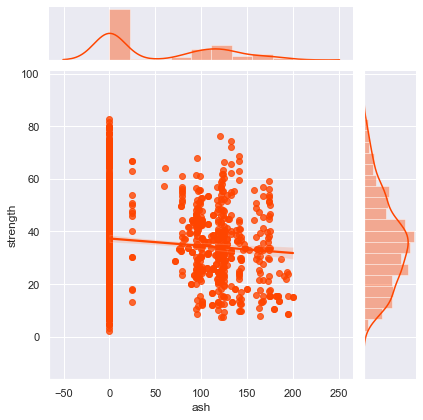

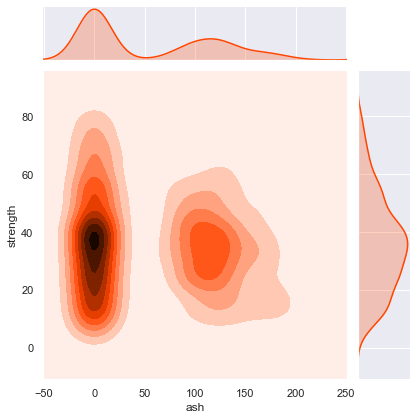

---------------------------------------------------------------
Visual Analysis of correlation for Feature :  water


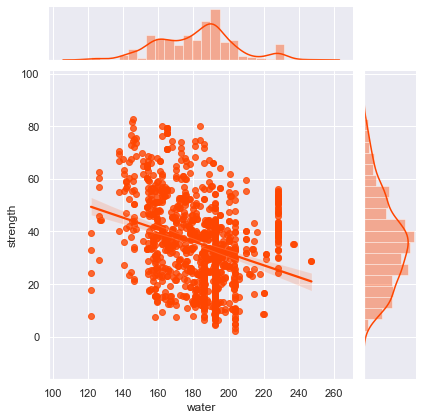

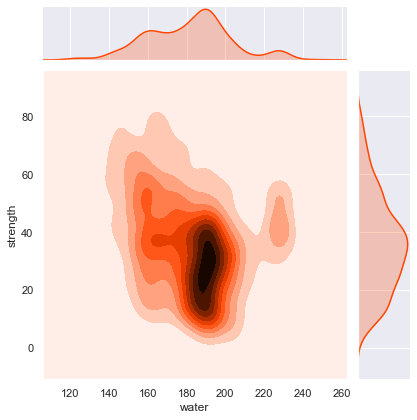

---------------------------------------------------------------
Visual Analysis of correlation for Feature :  superplastic


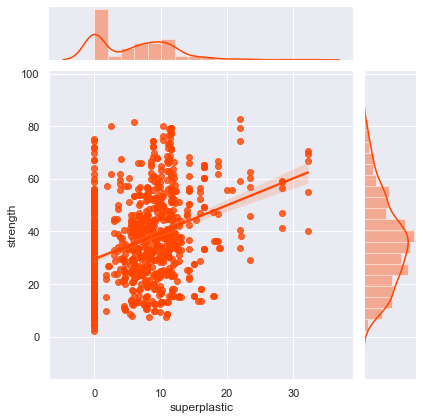

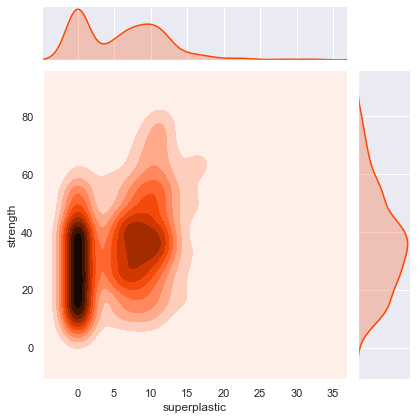

---------------------------------------------------------------
Visual Analysis of correlation for Feature :  coarseagg


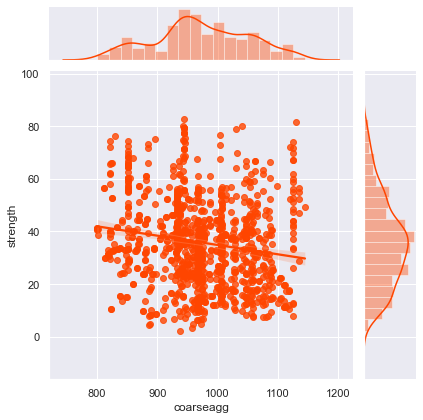

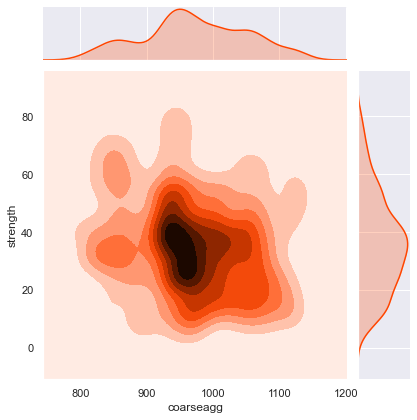

---------------------------------------------------------------
Visual Analysis of correlation for Feature :  fineagg


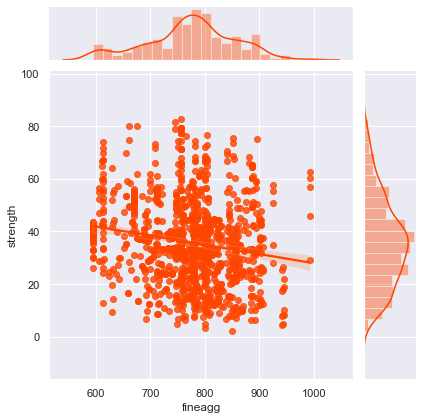

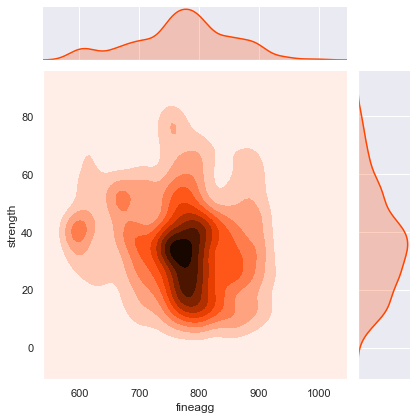

---------------------------------------------------------------
Visual Analysis of correlation for Feature :  age


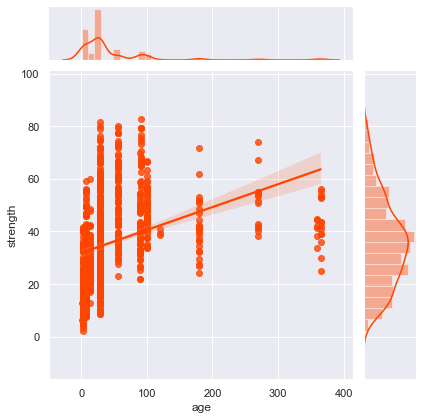

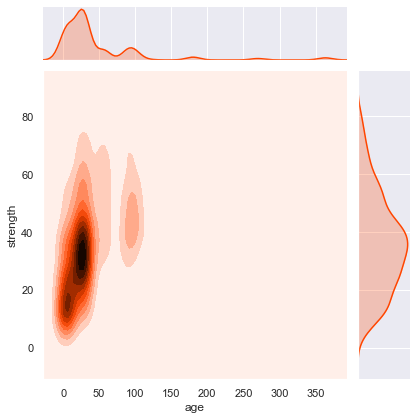

In [17]:
for i in features:
    Reg_visual(i,'strength')
    

### Insight:
- Cemenet correlates with strength (positive)
- Water correlated with strength (negative)

Less correlated features seems to be:
- age
- coarseagg
- superplastic

The age variable will be feature engineered later on with polynomial degree level 2

### Distribution by each feature - An Overview

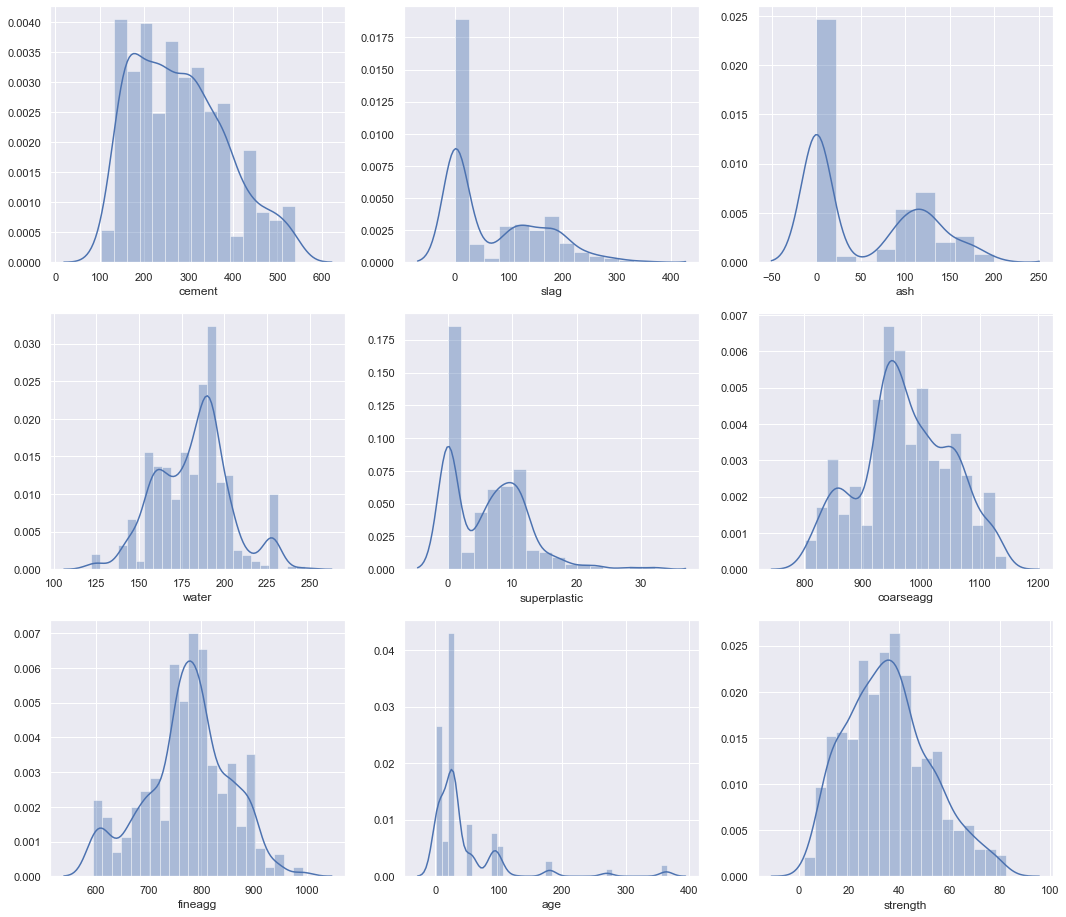

In [19]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

### Observation

- cement is almost normal distributed

- slag rightly skewed with two curves

- ash has two curves and rightly skewed.

- water has three curves and slighly left skewed.

- superplastic has two curves and rightly skewed.

- coarseagg has three curves and almost normally distributed

- fineagg has almost two curves and looks like it is normally distributed

- age has multiple curves and rightly skewed.

### Plot Distribution of variables with Bar plot and Box Plot

In [21]:
def plot_numerical(SelectedVar):

    print('-------  Analysis of the variable: ', SelectedVar, '   ------------')
    
    f, axes = plt.subplots(1,2,figsize=(14,4))

    sns.distplot(df[SelectedVar], ax = axes[0], fit=norm)
    axes[0].set_xlabel(SelectedVar, fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].yaxis.tick_left()

    sns.boxplot(x = SelectedVar, data = df, ax = axes[1])
    axes[1].set_xlabel(SelectedVar, fontsize=14)
    # axes[1].set_ylabel(SelectedVar, fontsize=14)
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

    plt.show()
    
def Outlier_Analysis(SelectedVar):
    print(' List all the observations defined as outliers: ')
    Q3 = df[SelectedVar].quantile(0.75)
    Q1 = df[SelectedVar].quantile(0.25)
    IQR = Q3 - Q1

    display(df.loc[(df[SelectedVar] < (Q1 - 1.5 * IQR)) | (df[SelectedVar] > (Q3 + 1.5 * IQR))].head())
    
    print("Variable analyzed: ", SelectedVar)
    
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(df[SelectedVar]))
    
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    
    print('Lower outliers: ', L_outliers)
    print('Upper outlierse: ', U_outliers)
    
    print('Number of outliers upper : ', df[df[SelectedVar]>U_outliers][SelectedVar].count())
    print('Number of outliers lower : ', df[df[SelectedVar]<L_outliers][SelectedVar].count())  

    print('% of Outlier upper: ',round(df[df[SelectedVar]>U_outliers][SelectedVar].count()*100/len(df)), '%')
    print('% of Outlier lower: ',round(df[df[SelectedVar]<L_outliers][SelectedVar].count()*100/len(df)), '%')

### Outlier Analysis - Strength - Dependent

-------  Analysis of the variable:  strength    ------------


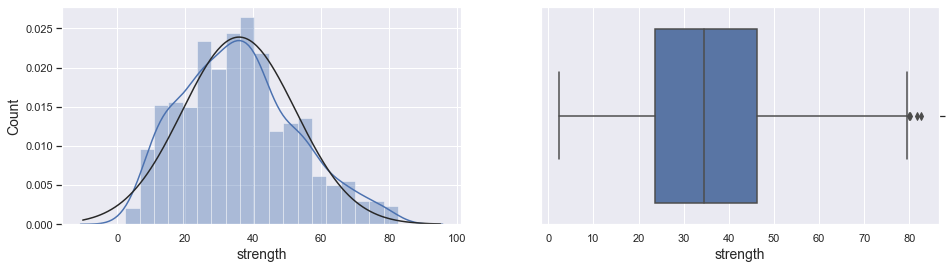

 List all the observations defined as outliers: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75


Variable analyzed:  strength
1st Quartile (Q1) is:  23.709999999999997
3st Quartile (Q3) is:  46.135000000000005
Interquartile range (IQR) is  22.425000000000008
Lower outliers:  -9.927500000000013
Upper outlierse:  79.77250000000001
Number of outliers upper :  4
Number of outliers lower :  0
% of Outlier upper:  0.0 %
% of Outlier lower:  0.0 %


In [195]:
# Analysis of Variable
plot_numerical('strength')
Outlier_Analysis('strength')

### Outlier Analysis - Slag

-------  Analysis of the variable:  slag    ------------


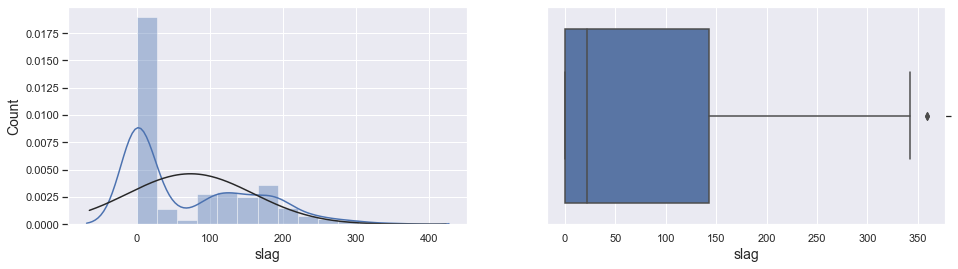

 List all the observations defined as outliers: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44


Variable analyzed:  slag
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95
Lower outliers:  -214.42499999999998
Upper outlierse:  357.375
Number of outliers upper :  2
Number of outliers lower :  0
% of Outlier upper:  0.0 %
% of Outlier lower:  0.0 %


In [196]:
# - Analysis of Variable
plot_numerical('slag')
Outlier_Analysis('slag')

### Outlier Analysis - Cement

-------  Analysis of the variable:  cement    ------------


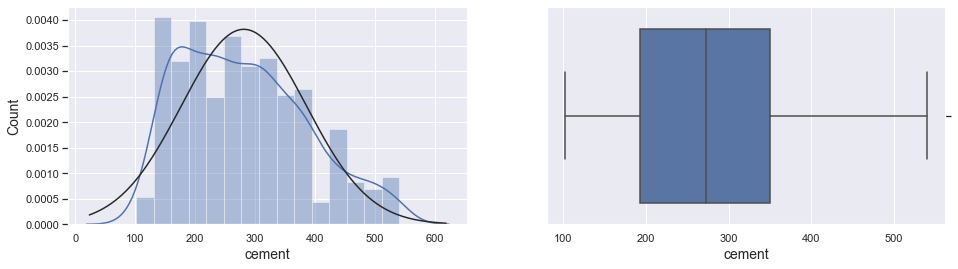

 List all the observations defined as outliers: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


Variable analyzed:  cement
1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625
Lower outliers:  -44.0625
Upper outlierse:  586.4375
Number of outliers upper :  0
Number of outliers lower :  0
% of Outlier upper:  0.0 %
% of Outlier lower:  0.0 %


In [197]:
# Analysis of Variable
plot_numerical('cement')
Outlier_Analysis('cement')

-------  Analysis of the variable:  ash    ------------


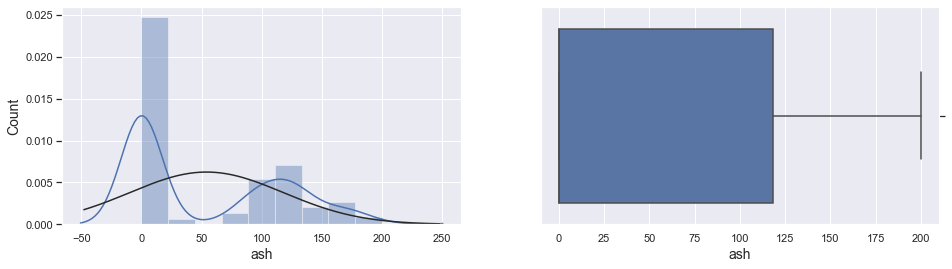

 List all the observations defined as outliers: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


Variable analyzed:  ash
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3
Lower outliers:  -177.45
Upper outlierse:  295.75
Number of outliers upper :  0
Number of outliers lower :  0
% of Outlier upper:  0.0 %
% of Outlier lower:  0.0 %


In [198]:
# Analysis of Variable
plot_numerical('ash')
Outlier_Analysis('ash')

-------  Analysis of the variable:  water    ------------


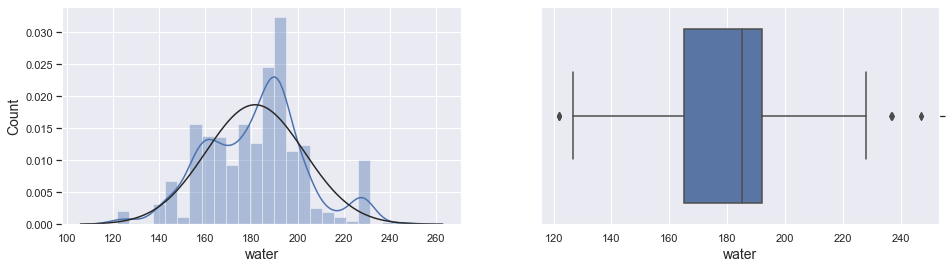

 List all the observations defined as outliers: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23


Variable analyzed:  water
1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994
Lower outliers:  124.25000000000001
Upper outlierse:  232.64999999999998
Number of outliers upper :  4
Number of outliers lower :  5
% of Outlier upper:  0.0 %
% of Outlier lower:  0.0 %


In [199]:
# Analysis of Variable
plot_numerical('water')
Outlier_Analysis('water')

-------  Analysis of the variable:  superplastic    ------------


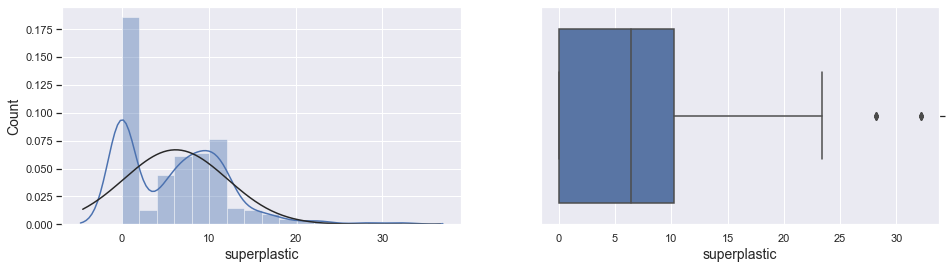

 List all the observations defined as outliers: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9


Variable analyzed:  superplastic
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2
Lower outliers:  -15.299999999999999
Upper outlierse:  25.5
Number of outliers upper :  10
Number of outliers lower :  0
% of Outlier upper:  1.0 %
% of Outlier lower:  0.0 %


In [200]:
# Analysis of Variable
plot_numerical('superplastic')
Outlier_Analysis('superplastic')

-------  Analysis of the variable:  coarseagg    ------------


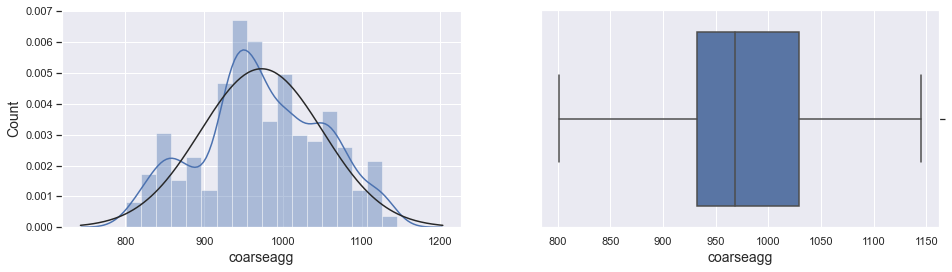

 List all the observations defined as outliers: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


Variable analyzed:  coarseagg
1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009
Lower outliers:  785.8999999999999
Upper outlierse:  1175.5000000000002
Number of outliers upper :  0
Number of outliers lower :  0
% of Outlier upper:  0.0 %
% of Outlier lower:  0.0 %


In [201]:
# Analysis of Variable
plot_numerical('coarseagg')
Outlier_Analysis('coarseagg')

-------  Analysis of the variable:  fineagg    ------------


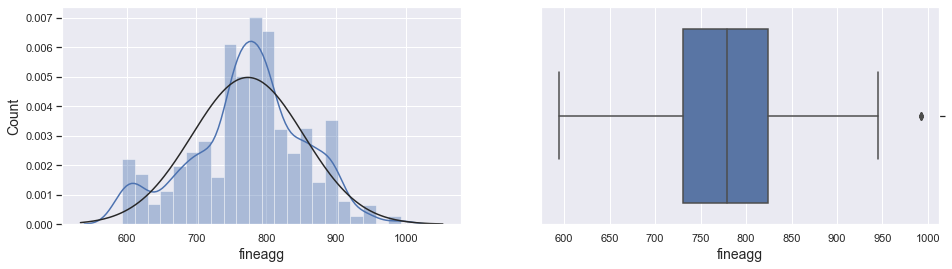

 List all the observations defined as outliers: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5


Variable analyzed:  fineagg
1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007
Lower outliers:  591.3749999999998
Upper outlierse:  963.575
Number of outliers upper :  5
Number of outliers lower :  0
% of Outlier upper:  0.0 %
% of Outlier lower:  0.0 %


In [202]:
# Analysis of Variable
plot_numerical('fineagg')
Outlier_Analysis('fineagg')

### Age

-------  Analysis of the variable:  age    ------------


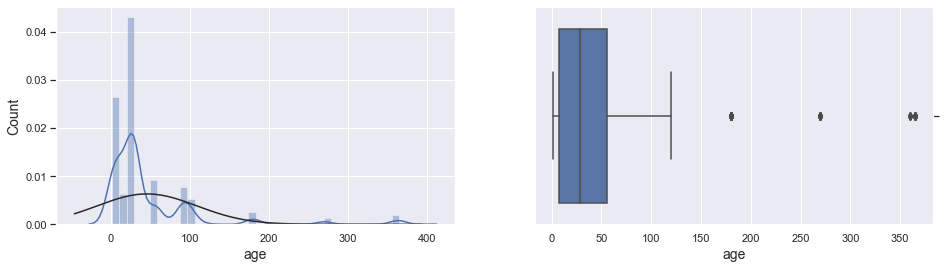

 List all the observations defined as outliers: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01


Variable analyzed:  age
1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0
Lower outliers:  -66.5
Upper outlierse:  129.5
Number of outliers upper :  59
Number of outliers lower :  0
% of Outlier upper:  6.0 %
% of Outlier lower:  0.0 %


In [203]:
# Analysis of Variable
plot_numerical('age')
Outlier_Analysis('age')

# Multivariate Analysis

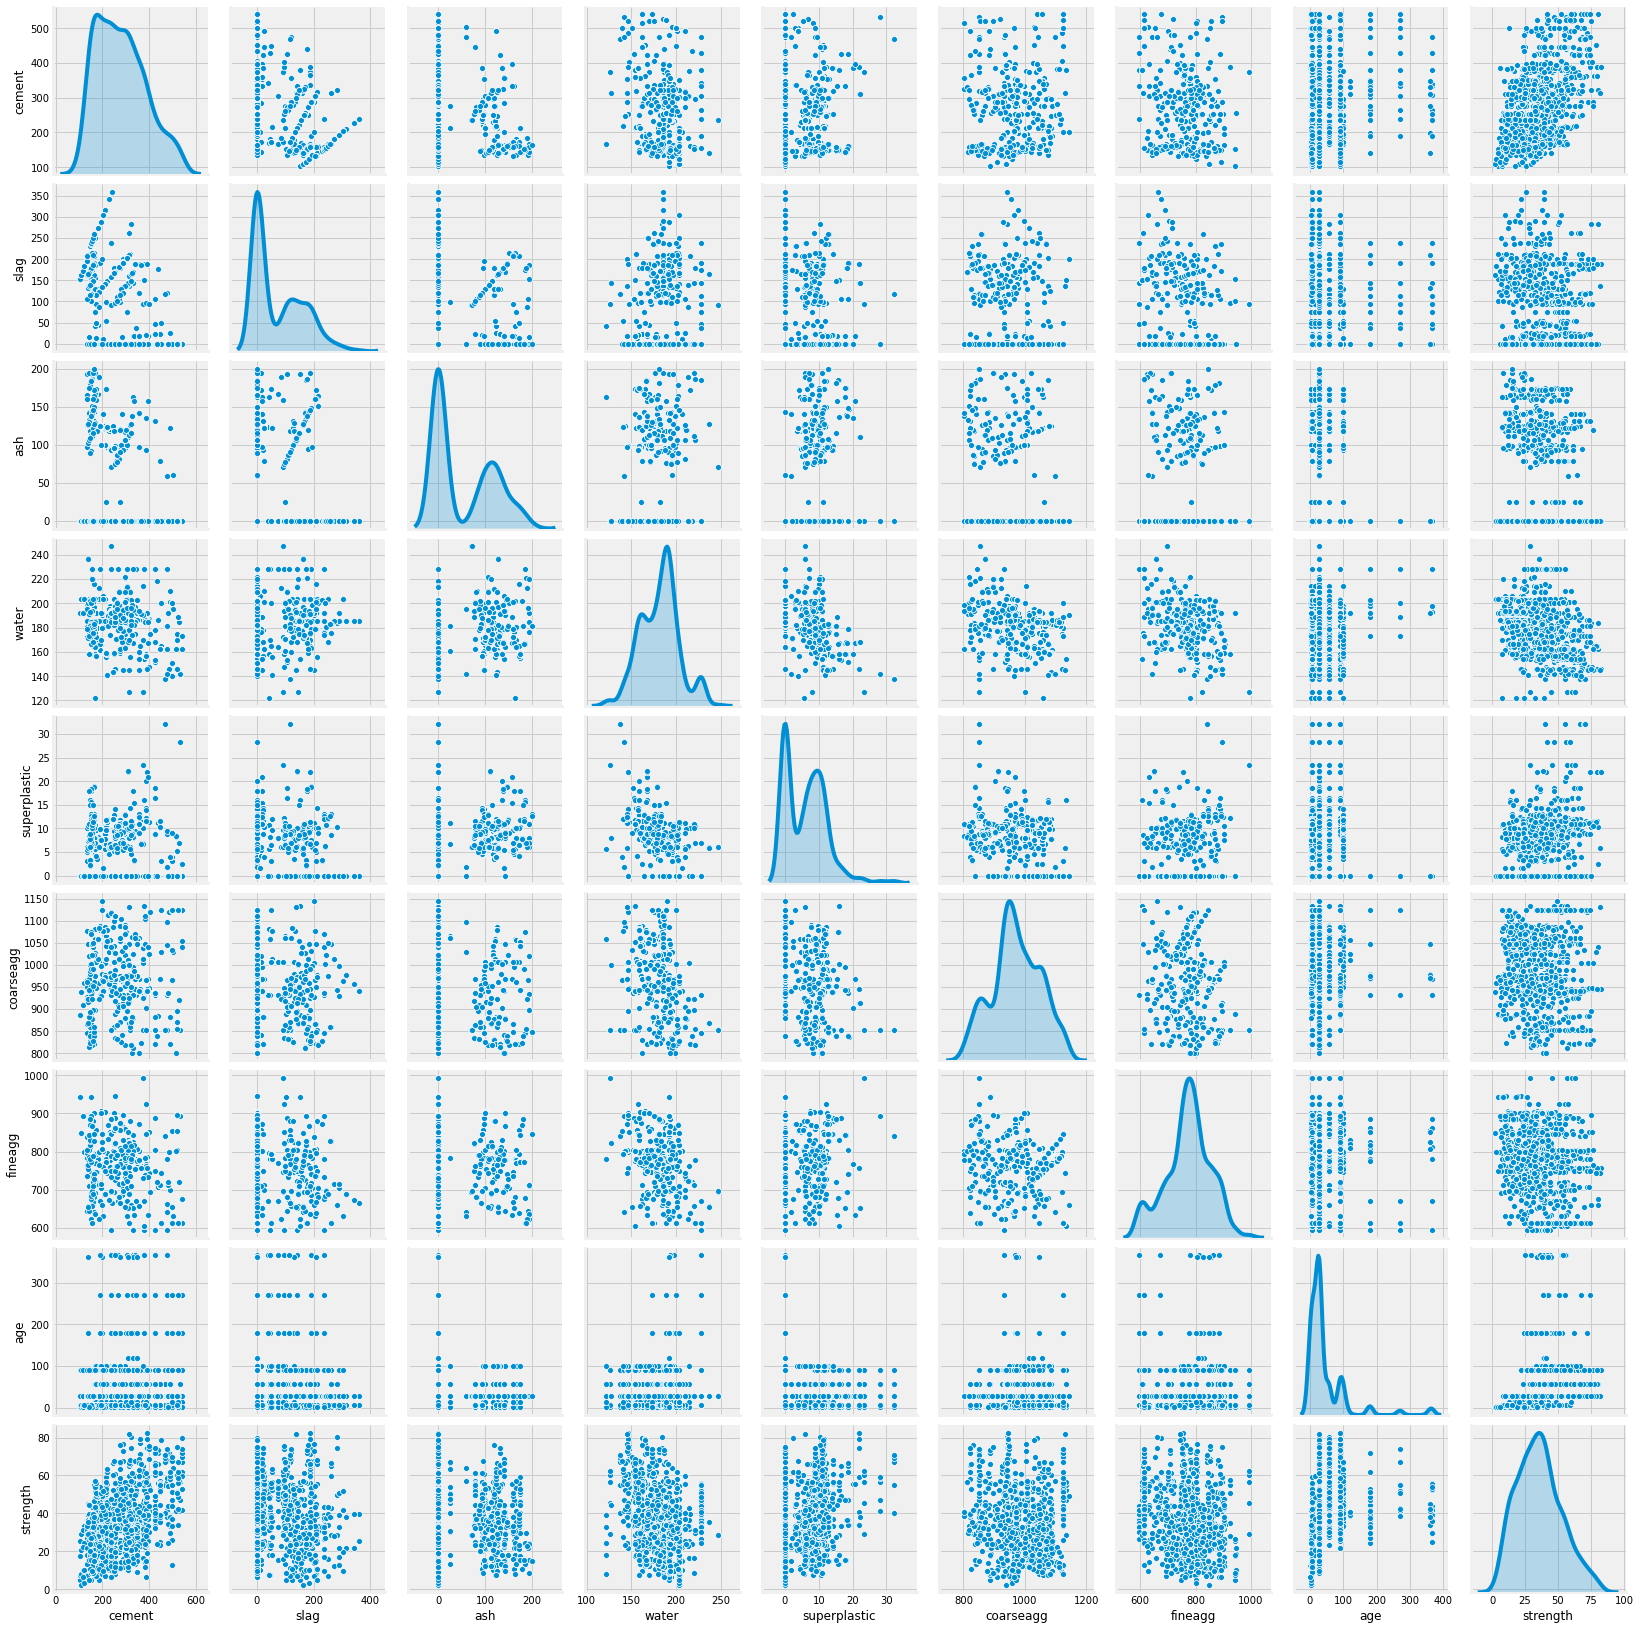

In [59]:
## pairplot- plot density curve instead of histogram in diagonal

sns.pairplot(df, diag_kind='kde')

### Observation - Diagonal analysis and dist plots analysis

As illustrated above, the impact of cement correlated with strength. The other features do not visually indicate clear linear relationsship.

The pearson correlation coefficients are presented in the heatmap below. Cement has the highes with 0.5 and appears to be nearly normal distributed

Strength is normally distributed
Slag and Ash has 2 gaussian curves and is skewed
Water and Superplastic have near normal distributions

Cement has strong correlation with strength
Slag is a very weak predictor as well as ash, coarseagg and fineagg
Water appears to have a negative correlation with strength
Superplastic appears to have positive correlation with strength
Age has also stronger correlation with strength

There are correlations between features. Ones to mention particularly are : a highly negative correlation between Superplastic and Water, but a positive correlation between Superplastic and Ash. Also, Cement and slag have strong correlation, and
Water and superplastic have strong negative correlation

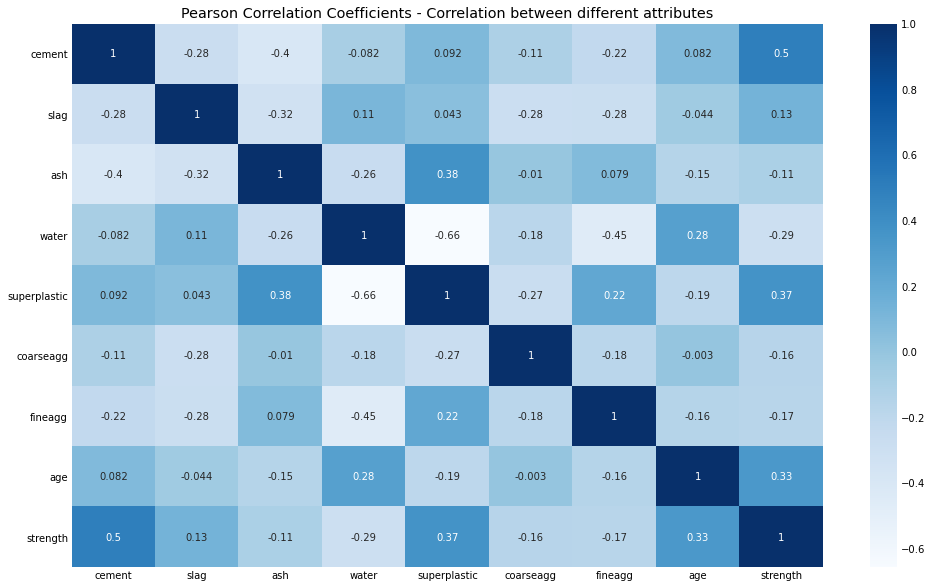

In [23]:
corr = df.corr()

plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title('Pearson Correlation Coefficients - Correlation between different attributes')
plt.show()

### Insight 
There is a high positive correlation between compressive Strength and Cement. This is also as espected because strength of concrete indeed increases with an increase in the amount of cement used in preparing it. In addition Age and Superplastic are the other two factors influencing Compressive strength. Water has a negatvie correlation with strength. This is also analysed in a bubble chart further down in the note book.


Between features there is a strong negative correlation between Superplastic and Water. There is also positive correlations between Superplastic and Ash, fineagg.

### Bubble chart to visualize Strength and Cement with Age as a third dimension

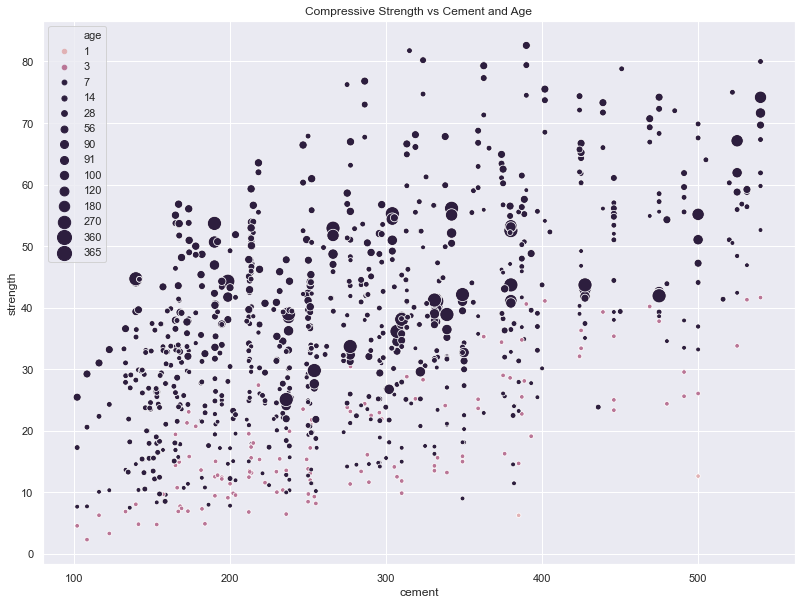

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(
    data=df, x="cement", y="strength", hue="age", size="age",
    sizes=(20, 200), hue_norm=(0, 7), legend="full"
)
ax.set_title("Compressive Strength vs Cement and Age")
ax.legend()
plt.show()

#### Insight
- We can clearly see that Compressive Strength correlates positively with Cement
- Compressive Strength correlates positively with Age as well, seen by the size of the bubbles, however, the bubbles are more scattered.

### Bubble chart to visualize Strength and Water with Age as a third dimension

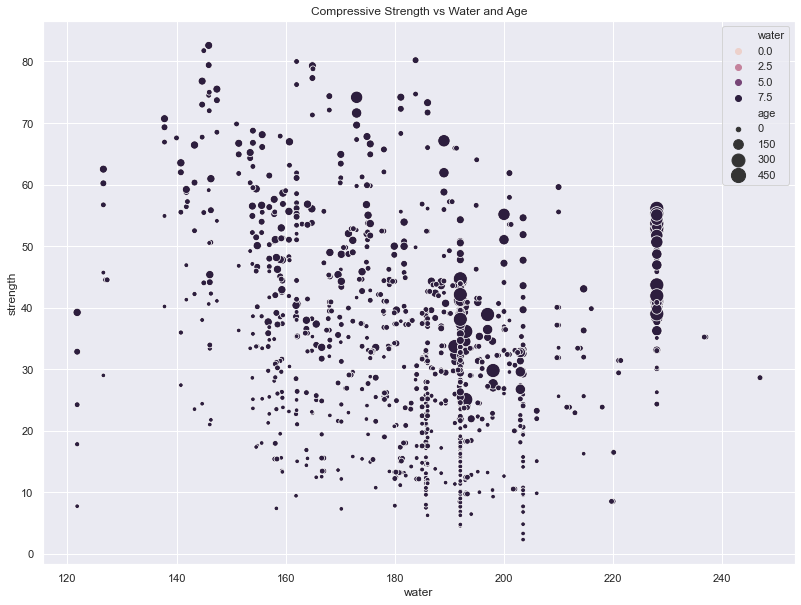

In [237]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(
    data=df, x="water", y="strength", hue="water", size="age",
    sizes=(20, 200), hue_norm=(0, 7)
)
ax.set_title("Compressive Strength vs Water and Age")
ax.legend()
plt.show()

As there is more water the strength seems to be lower, negative correlation as seen above. The age seems to be a factor in this.

## Feature Engineering

#### Analyze Age and apply second degree polymomial function to check if there is a convex curge for age

I will use the statsmodel to investigate the form of the curve and the change in R sqaured value

In [48]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

sub1 = df[['age', 'water', 'strength','cement']].dropna()

# center quantitative IVs for regression analysis
sub1['age_c'] = (sub1['age'] - sub1['age'].mean())
sub1['water_c'] = (sub1['water'] - sub1['water'].mean())
sub1['strength_c'] = (sub1['strength'] - sub1['strength'].mean())


# linear regression analysis
reg1 = smf.ols('strength ~ age_c', data=sub1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           2.11e-27
Time:                        09:23:49   Log-Likelihood:                -4302.3
No. Observations:                1030   AIC:                             8609.
Df Residuals:                    1028   BIC:                             8618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.8180      0.492     72.828      0.0

Text(0, 0.5, 'strength')

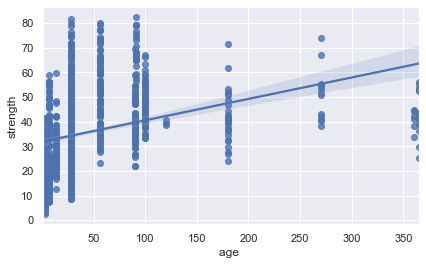

In [51]:
# first order (linear) scatterplot
scat1 = sns.regplot(x="age", y="strength", scatter=True, data=sub1)
plt.xlabel('age ')
plt.ylabel('strength')



Text(0, 0.5, 'Strength')

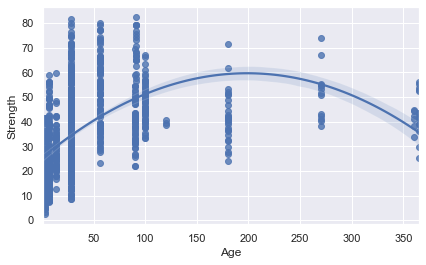

In [52]:
# fit second order polynomial
# run the 2 scatterplots together to get both linear and second order fit lines
scat1 = sns.regplot(x="age", y="strength", scatter=True, order=2, data=sub1)
plt.xlabel('Age')
plt.ylabel('Strength')

#### The independent variable is centered to easier interpret the coefficient when applying polynomial impact
The R squared is 10,8 precent and the correlation of age with strength is positive, as the coefficient is positive

In [53]:
reg2 = smf.ols('strength ~ age_c + I(age_c**2)', data=sub1).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           6.70e-67
Time:                        09:25:41   Log-Likelihood:                -4208.4
No. Observations:                1030   AIC:                             8423.
Df Residuals:                    1027   BIC:                             8438.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        39.2845      0.510     76.999

#### Insight: Age has a convex curve
When we look at the table of results, we see that the value for the linear term for age is positive, and the p value is less than 0.05. In addition, the quadratic term is negativly insignificant, indicating that the curvilinear pattern we observed in our scatter plot is statistically significant. A positve linear coefficient and a negatve quadratic coefficient indicates that the curve is convex.

The feature engineered age squared feature will be created after the outlier treatment section below and included in the df3 dataset

## Outliers and adjustments

In [78]:
    
def Outlier_Analysis2(SelectedVar):
    #print(' List all the observations defined as outliers: ')
    Q3 = df[SelectedVar].quantile(0.75)
    Q1 = df[SelectedVar].quantile(0.25)
    IQR = Q3 - Q1

    # display(df.loc[(df[SelectedVar] < (Q1 - 1.5 * IQR)) | (df[SelectedVar] > (Q3 + 1.5 * IQR))].head())
    
    print("Variable analyzed: ", SelectedVar)
    
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    
    print('    Number of outliers upper : ', df[df[SelectedVar]>U_outliers][SelectedVar].count())
    print('    Number of outliers lower : ', df[df[SelectedVar]<L_outliers][SelectedVar].count())  


In [79]:
varList = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age']

In [80]:
for i in varList:
    Outlier_Analysis2(i)

Variable analyzed:  cement
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  slag
    Number of outliers upper :  2
    Number of outliers lower :  0
Variable analyzed:  ash
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  water
    Number of outliers upper :  4
    Number of outliers lower :  5
Variable analyzed:  superplastic
    Number of outliers upper :  10
    Number of outliers lower :  0
Variable analyzed:  coarseagg
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  fineagg
    Number of outliers upper :  5
    Number of outliers lower :  0
Variable analyzed:  age
    Number of outliers upper :  59
    Number of outliers lower :  0


### Dataset - New copy set up for removal of outliers

In [81]:
# Create df2 --> Dataset with no outliers
df2 = df.copy()



## Outlier Management - Replace Outliers with median values

In [82]:
# Function which replace outliers with median value. Call the function with the dataframe to be processed
def Clean_Outliers(My_df):
    for cols in df.columns[:-1]:
        Q1 = df[cols].quantile(0.25)
        Q3 = df[cols].quantile(0.75)
        iqr = Q3 - Q1
    
        low = Q1-1.5*iqr
        high = Q3+1.5*iqr
        My_df.loc[(My_df[cols] < low) | (My_df[cols] > high), cols] = My_df[cols].median()
    

In [83]:
# Call function with selected dataset
Clean_Outliers(df2)

In [84]:
# Function to check if there are any outliers. Call the function with selected variable and the dataframe where 

def Outlier_Analysis3(SelectedVar, My_df):
    #print(' List all the observations defined as outliers: ')
    Q3 = df[SelectedVar].quantile(0.75)
    Q1 = df[SelectedVar].quantile(0.25)
    IQR = Q3 - Q1

    
    print("Variable analyzed: ", SelectedVar)
    
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    
    print('    Number of outliers upper : ', My_df[My_df[SelectedVar]>U_outliers][SelectedVar].count())
    print('    Number of outliers lower : ', My_df[My_df[SelectedVar]<L_outliers][SelectedVar].count()) 

In [85]:
# Loop through a defined list of column names and the dataframe these belongs to the function to check for outleirs
for i in varList:
    Outlier_Analysis3(i,df2)

Variable analyzed:  cement
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  slag
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  ash
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  water
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  superplastic
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  coarseagg
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  fineagg
    Number of outliers upper :  0
    Number of outliers lower :  0
Variable analyzed:  age
    Number of outliers upper :  0
    Number of outliers lower :  0


#### Insight: There are no statistical defined outliers after outlier treatment

### Adding the Age squared features enginered variable

In [87]:
# Create df3 --> Dataset with no outliers and quadratic age feature
df3 = df2.copy()
df3['age_2'] = (df3['age']*df3['age'])

# Data Preperation for modelling

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [113]:
# Splitting the features and target variable

cols = df3.columns.drop('strength')
X = df3[cols]
y = df3['strength']

In [114]:
# SelectedCols includes all the feautres you want to include
scaler = StandardScaler();

SelectedCols = X.columns

# Set Features eqaul to X , which is already excluded features we do not want to include in our model
features = X

scaler.fit(features[SelectedCols])
scaled_features = pd.DataFrame(scaler.transform(features[SelectedCols]),columns=SelectedCols)

features =features.drop(SelectedCols,axis=1)
X = scaled_features.join(features)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,age_2
995,-1.173397,0.886533,0.966321,-0.318217,1.648808,-0.252443,-0.671786,-0.153159,-0.354301
507,1.367395,-0.600409,1.216455,-0.177394,0.461486,-1.941924,-0.286608,-0.153159,-0.354301
334,-0.058090,-0.858192,1.050741,-1.075749,0.717217,1.038150,0.062976,-1.052756,-0.621207
848,-0.279237,0.278398,0.340989,0.599562,0.370154,-1.774648,0.615953,-0.153159,-0.354301
294,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-1.052756,-0.621207


In [117]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

#### Linear Regression

In [118]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Ridge Regression

In [119]:
ridge_alpha = RidgeCV(cv=10)
ridge_alpha.fit(X_train, y_train)
alpha = ridge_alpha.alpha_

ridge = Ridge(alpha=alpha, random_state=42)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, random_state=42)

#### Lasso Regression

In [120]:
lasso_alpha = LassoCV(cv=10)
lasso_alpha.fit(X_train, y_train)
alpha = lasso_alpha.alpha_

lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.014037461381067732, random_state=42)

#### Elastic Net Regression - Combined Ridge and Lasso

In [121]:
EN_alpha = ElasticNetCV(cv=10)
EN_alpha.fit(X_train, y_train)
alpha= EN_alpha.alpha_

EN = ElasticNet(alpha=alpha, random_state=42)
EN.fit(X_train, y_train)

ElasticNet(alpha=0.017226512277670004, random_state=42)

In [122]:
# List of trained linear Models
LinearModels = [lr, ridge, lasso, EN]

### Make Prediction on X Test set using linear Models

In [123]:
# Function to calculate score metrics for both Linear Models and Ensemble Models

def make_pred(models, X_test, y_test):    
    results = {}
    
    for model in models:
        y_pred = model.predict(X_test)
        results[type(model).__name__] = [mean_squared_error(y_test, y_pred)**(1/2),                                          
                                         mean_squared_error(y_test, y_pred), 
                                         mean_absolute_error(y_test, y_pred), 
                                         r2_score(y_test, y_pred)]
        
        results = pd.DataFrame(results, index=['RMSE','MSE','MAE','R2'])
        
    return results

In [124]:
make_pred(LinearModels, X_test, y_test).T

,RMSE,MSE,MAE,R2
LinearRegression,7.723984,59.659930,5.893626,0.768470
Ridge,7.724369,59.665874,5.893769,0.768447
Lasso,7.736441,59.852518,5.908942,0.767723
ElasticNet,7.825142,61.232840,5.998165,0.762366


#### Insight:
- With outlier treatment, the R2 score for all models improved fra around 0.62 to 0.68 (Previous version not shown)
- Adding polynomial degree to the age feature, the R2 even improved from 0.68 to almost 0.77

- There are very little difference between the models
- The R square score is fairly good for these linear models with close to 80% explaining the variablility in the dependent variable 'Strength' 

### Explanation of the metrics

Root Mean Square Error (RMSE) RMSE is the square root of the error function that the regression algorithms are trying to reduce. It is an absolute measure of how well the model fits the data.

Mean Absolute Error (MAE) Similarly to RMSE, MAE looks at the sum of the value of errors. Since it's not squaring the value and instead taking the absolute value, it is more forgiving to large prediction errors.

R -squared is a statistical measure of how close the data are to the fitted regression line.
R Square R Square measures how much variability in a dependent variable can be explained by the model. It is a good metric to determine the fit on dependent variables. However, it does not take into consideration overfitting.



# Ensemble Models

### RandomForestRegressor

In [140]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

### View the R2 score of the training of the untuned Random Forest model

In [143]:
print('R Squared Error - Training: ',rf_model.score(X_train, y_train))

R Squared Error - Training:  0.9825118078032997


In [162]:
Ensemble_models = [rf_model]

### K Fold Cross Validation 1 : RMSE 

RMSE:  [4.96503762 6.10510886 6.38940942 4.11209774 5.29478522 5.38543305
 4.25663793 4.75322378 5.91246078 4.76282999 4.96423504 4.10276835
 5.68288369 4.51033104 5.14147696]
-----------  Overall Mean Square Error ----------
Mean RMSE:  5.08924796353042


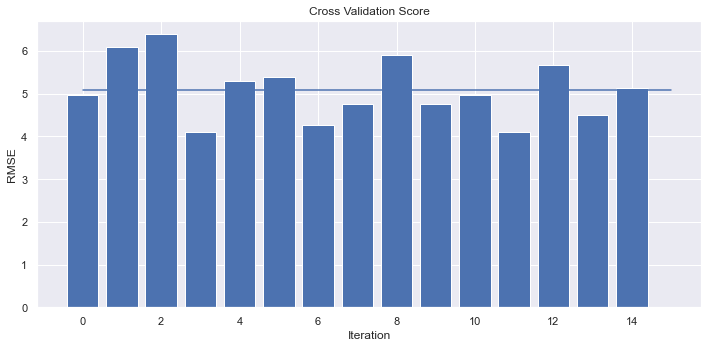

In [145]:
# CROSS VALIDATION OF TRAINING SET -- Mean Squared Error  -- Graphical representation
def CrossValScoreGraph(My_Classifier):
    
    from sklearn.metrics import make_scorer, mean_squared_error
    scorer = make_scorer(mean_squared_error, False)

    cv_score = np.sqrt(-cross_val_score(estimator=My_Classifier, X=X_train, y=y_train, cv=15, scoring = scorer))

    plt.figure(figsize=(10,5))
    plt.bar(range(len(cv_score)), cv_score)
    plt.title('Cross Validation Score')
    plt.ylabel('RMSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
    plt.tight_layout()
    
    print('RMSE: ', cv_score)
    mean_value = cv_score.mean()
    print('-----------  Overall Mean Square Error ----------')
    print('Mean RMSE: ', mean_value)
    
CrossValScoreGraph(rf_model)

### K Fold Cross Validation 1 : R Squared value

In [146]:
# CROSS VALIDATION OF TRAINING SET -- R2 Accuracy Score

def crossvalScore(MyClassifier,nbr_of_k):
    
    kfold = KFold(n_splits=nbr_of_k,random_state=70)
    K_results = cross_val_score(MyClassifier,X_train,y_train,cv=kfold)
    print(K_results)
    mean_value = K_results.mean()
    print('-----------  Overall Accuracy Score ----------')
    print('Accuracy Score R2: ', mean_value)
    
crossvalScore(rf_model,10)

[0.88082896 0.91166552 0.94930738 0.86499306 0.93889768 0.87931761
 0.9165437  0.90687574 0.88400682 0.89506744]
-----------  Overall Accuracy Score ----------
Accuracy Score R2:  0.9027503914415262


#### Comment: The cross validation score is 0,90 compared with 0,98 for the training score. The model seems to overfit 

### K Fold Cross Validation 1 : R Squared value - Graphical presentation

R2 Score:  [0.92913121 0.81026566 0.93792829 0.87552188 0.95165953 0.93987186
 0.87601009 0.86140516 0.9322679  0.95430411 0.91569162 0.86852828
 0.93558566 0.90272574 0.87212472 0.93881114 0.85546561 0.92558813
 0.86714998 0.91636345]
-----------  Overall Mean Square Error ----------
Mean R2 Score:  0.90332000013873


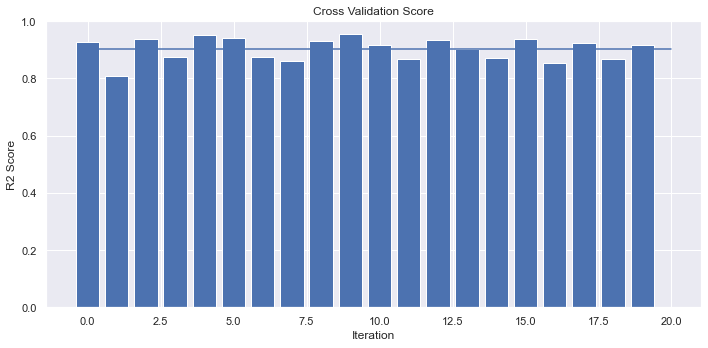

In [147]:
def CrossValScoreGraph_r2Score(My_Classifier):
    
    from sklearn.metrics import make_scorer, r2_score
    scorer = make_scorer(r2_score, False)

    cv_score = -cross_val_score(estimator=My_Classifier, X=X_train, y=y_train, cv=20, scoring = scorer)

    plt.figure(figsize=(10,5))
    plt.bar(range(len(cv_score)), cv_score)
    plt.title('Cross Validation Score')
    plt.ylabel('R2 Score')
    plt.xlabel('Iteration')

    plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
    plt.tight_layout()
    
    print('R2 Score: ', cv_score)
    mean_value = cv_score.mean()
    print('-----------  Overall Mean Square Error ----------')
    print('Mean R2 Score: ', mean_value)
    
CrossValScoreGraph_r2Score(rf_model)

### Feature Importance

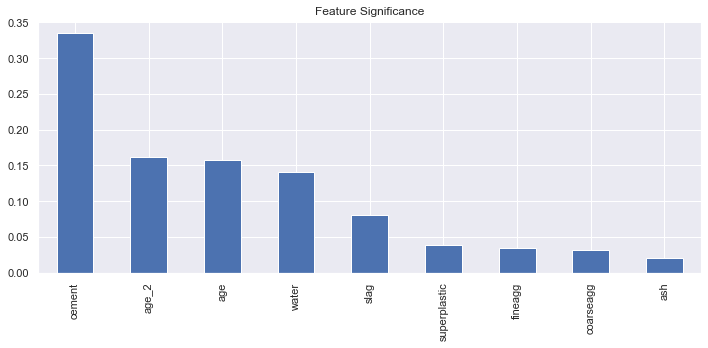

In [149]:
def MyClassifierFeatureImportance(MyClassifier):
    # Fit model with training data
    MyClassifier.fit(X_train, y_train)
    coef = pd.Series(MyClassifier.feature_importances_, index = X_train.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    coef.head(25).plot(kind='bar')
    plt.title('Feature Significance')
    plt.tight_layout()
    
MyClassifierFeatureImportance(rf_model)

#### Comment: Cement, Age and water and to some extent Slag are the 4 most important features, where Cement is clearly the most important feature

### Function for prediction and metric report

###  Random Forest - Predict on the test set

In [159]:
def make_predictons(name, models, X_test, y_test):    
    results = {}
    
    for model in models:
        y_pred = model.predict(X_test)
        results[name, type(model).__name__] = [mean_squared_error(y_test, y_pred)**(1/2),                                          
                                         mean_squared_error(y_test, y_pred), 
                                         mean_absolute_error(y_test, y_pred), 
                                         r2_score(y_test, y_pred)]
        
        results = pd.DataFrame(results, index=['RMSE','MSE','MAE','R2'])
        
    return results        
        


In [163]:
make_predictons('Random Forest Model',Ensemble_models, X_test, y_test).T

,,RMSE,MSE,MAE,R2
Random Forest Model,RandomForestRegressor,5.812168,33.781293,4.118538,0.868901


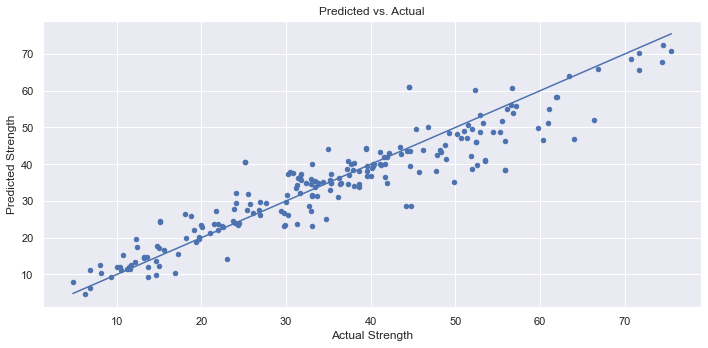

In [151]:
def Actual_vs_Predicted(MyClassifier):
    
    MyClassifier.fit(X_train, y_train)
    y_pred = MyClassifier.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, s=20)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual Strength')
    plt.ylabel('Predicted Strength')

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    plt.tight_layout()
    
Actual_vs_Predicted(rf_model)

### Random Forest - Hyper parameter tuning

In [152]:
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(random_state=7)

params = {
    'bootstrap': [True,False],
    'max_depth': [10,11,12],
    'max_features': ['sqrt','log2',0.5],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [300,400,500,550]
}    

grid = GridSearchCV(estimator = model_rf, param_grid = params, cv = k)

grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=7),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 11, 12],
                         'max_features': ['sqrt', 'log2', 0.5],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [300, 400, 500, 550]})

In [153]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

## View Results of tuning in two ways

### 1. View Training and Test Results using grid.best_params 

In [154]:
print("Training Score",grid.score(X_train,y_train))
print("Testing Score",grid.score(X_test,y_test))

Training Score 0.9791328785130257
Testing Score 0.8675207894537733


### 2. View Training and Test by imputing best parameteres into the regressor in detail

In [155]:
rf_model_tuned = RandomForestRegressor(n_estimators=400,                                         
                                       criterion='mse', 
                                       max_depth=11, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       max_features=0.5) 



In [156]:
rf_model_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, max_features=0.5, n_estimators=400)

In [157]:
# R Squared on test
print('R Squared Error - Training: ',rf_model_tuned.score(X_train, y_train))
print('R Squared Error - Test: ',rf_model_tuned.score(X_test, y_test))



R Squared Error - Training:  0.9786925786844548
R Squared Error - Test:  0.8666471174158299


In [160]:
make_predictons('Tuned Random Forest Model',Ensemble_models, X_test, y_test).T

,,RMSE,MSE,MAE,R2
Tuned Random Forest Model,RandomForestRegressor,5.861907,34.361957,4.201743,0.866647


### GradientBoostingRegressor

In [164]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [165]:
Ensemble_models = [gb_model]

In [166]:
make_pred(Ensemble_models, X_test, y_test).T

,RMSE,MSE,MAE,R2
GradientBoostingRegressor,5.790195,33.526354,4.338646,0.86989


R2 Score:  [0.89483303 0.82599883 0.92172103 0.8362299  0.93399004 0.89666676
 0.89554197 0.85441564 0.94257946 0.95692941 0.8995719  0.90452149
 0.9544446  0.87374281 0.86709453 0.94276259 0.85885109 0.90978484
 0.86415271 0.85522198]
Mean R2 Score:  0.8944527294771689


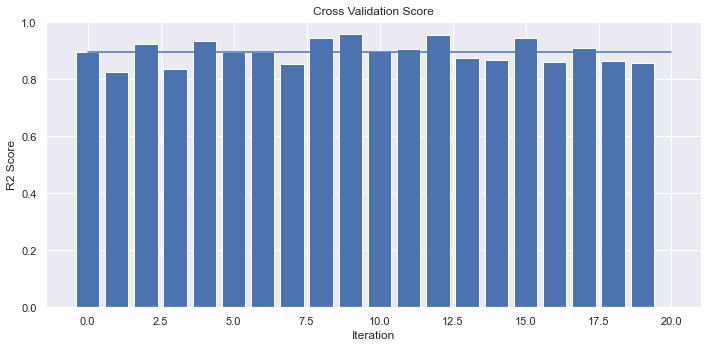

In [169]:
def CrossValScoreGraph_r2Score(My_Classifier,nbr_of_k):
    
    from sklearn.metrics import make_scorer, r2_score
    scorer = make_scorer(r2_score, False)

    cv_score = -cross_val_score(estimator=My_Classifier, X=X_train, y=y_train, cv=nbr_of_k, scoring = scorer)

    plt.figure(figsize=(10,5))
    plt.bar(range(len(cv_score)), cv_score)
    plt.title('Cross Validation Score')
    plt.ylabel('R2 Score')
    plt.xlabel('Iteration')

    plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
    plt.tight_layout()
    
    print('R2 Score: ', cv_score)
    mean_value = cv_score.mean()
    print('Mean R2 Score: ', mean_value)
    
CrossValScoreGraph_r2Score(gb_model,20)

In [170]:
gb_model2 = GradientBoostingRegressor(random_state=7)

# paramList1 = {'n_estimators':range(100,901,10)}

params = {
    'learning_rate': [0.1],
    'min_samples_split': [500],
    'max_depth': [8],

    'subsample': [0.9],
    'random_state' : [10],
    'n_estimators': [800,900,1000]
}    

grid_gb2 = GridSearchCV(estimator = gb_model2, param_grid = params, cv = 10)

grid_gb2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=7),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_samples_split': [500],
                         'n_estimators': [800, 900, 1000], 'random_state': [10],
                         'subsample': [0.9]})

In [171]:
print("Optimal value for n_estimators :{}".format(grid_gb2.best_params_['n_estimators']))
print("Model best Score: {}".format(round(grid_gb2.best_score_,4)))
print('R squared: {}'.format(round(grid_gb2.score(X_train, y_train),4)))

Optimal value for n_estimators :1000
Model best Score: 0.9166
R squared: 0.9715


In [172]:
print("Training Score",grid_gb2.score(X_train,y_train))
print("Testing Score",grid_gb2.score(X_test,y_test))

Training Score 0.9714858907855557
Testing Score 0.911795738487515


In [173]:
Ensemble_models = [grid_gb2]

In [174]:
make_predictons('Tuned Gradient Boosting Model',Ensemble_models, X_test, y_test).T

,,RMSE,MSE,MAE,R2
Tuned Gradient Boosting Model,GridSearchCV,4.76741,22.7282,3.468282,0.911796


### AdaBoostRegressor

In [175]:
ada_model = AdaBoostRegressor()
ada_model.fit(X_train,y_train)

AdaBoostRegressor()

In [176]:
Ensemble_models = [ada_model]

In [177]:
make_pred(Ensemble_models, X_test, y_test).T

,RMSE,MSE,MAE,R2
AdaBoostRegressor,7.992235,63.875818,6.619013,0.752109


R2 Score:  [0.78990492 0.74467929 0.80629102 0.7254209  0.86092633 0.82103023
 0.74379195 0.76271343 0.84097978 0.82514868 0.75679366 0.79357486
 0.82543958 0.79179913 0.73537164 0.79373583 0.73121013 0.74331921
 0.70481956 0.83617972]
Mean R2 Score:  0.781656491776896


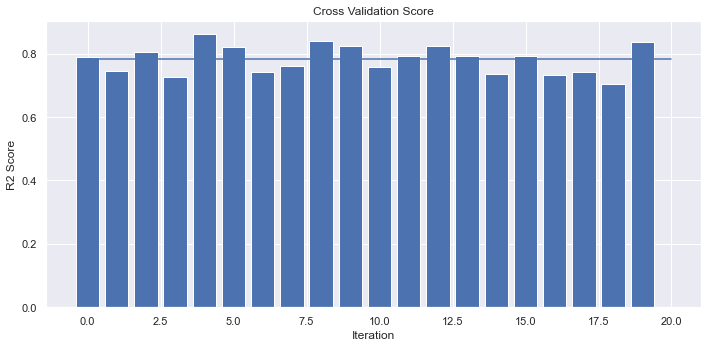

In [178]:
CrossValScoreGraph_r2Score(ada_model,20)

In [179]:
ada_model2 = AdaBoostRegressor()

params = {
    'learning_rate': [1, 0.1],
    'random_state' : [10],
    'n_estimators': [500,600,700,800,900,1000]
}    

grid_ada2 = GridSearchCV(estimator = ada_model2, param_grid = params, cv = 10)

grid_ada2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1, 0.1],
                         'n_estimators': [500, 600, 700, 800, 900, 1000],
                         'random_state': [10]})

In [180]:
Ensemble_models = [grid_ada2]
make_predictons('Tuned Ada Boost Model',Ensemble_models, X_test, y_test).T

,,RMSE,MSE,MAE,R2
Tuned Ada Boost Model,GridSearchCV,7.899643,62.404355,6.555852,0.757819


### XG Boost Regressor

In [181]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

In [182]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [183]:
print("Training Score",XGB_model.score(X_train,y_train))
print("Testing Score",XGB_model.score(X_test,y_test))

Training Score 0.9927856094533439
Testing Score 0.886547137206827


In [196]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.1, 0.2],
        'max_depth': [3,5,7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [200, 300, 350, 400],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [197]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.0min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 300,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [198]:

xgb_model2 = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 5,
        min_child_weight = 5,
        n_estimators = 300,
        subsample = 0.5)

In [199]:
xgb_model2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
print("Training Score",xgb_model2.score(X_train,y_train))
print("Testing Score",xgb_model2.score(X_test,y_test))

Training Score 0.9848914903277234
Testing Score 0.9029150951864765


In [201]:
Ensemble_models = [xgb_model2]
make_predictons('Tuned XG Boost Model',Ensemble_models, X_test, y_test).T

,,RMSE,MSE,MAE,R2
Tuned XG Boost Model,XGBRegressor,5.001653,25.016537,3.406274,0.902915


### Summarize the ensemble models

### Assignment Request:
Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model.

### Comment: 
This Metric indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.


- 0% represents a model that does not explain any of the variation in the Dependent variable around its mean. 

- 100% represents a model that explains all of the variation in the response variable around its mean.


Our dependent variable is "Strength", and the collectively R square score is 91%, which means, the feautres applied in the model collectively explain 90% of the variance in the Strength of concrete.

The larger the R2 score, the better the regression model fits your observations. However, we cannot determine whether the coefficient estimates and predictions are biased, which is why the residual plots should be added to the final analysis.

The Gradient Boosting Model achieved the best performance of 91% R2 squared value, while XB Boost regression model was very close to this value.

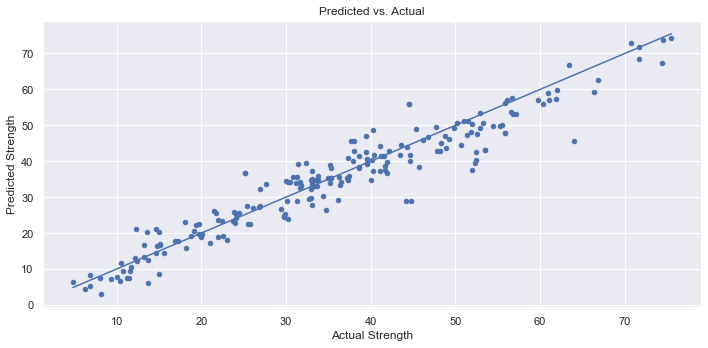

In [222]:
def Actual_vs_Predicted(MyClassifier):
    
    MyClassifier.fit(X_train, y_train)
    y_pred = MyClassifier.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, s=20)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual Strength')
    plt.ylabel('Predicted Strength')

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    plt.tight_layout()
    
Actual_vs_Predicted(grid_gb2)

#### This residual analysis shows good fit to the regression line, however, there are more scattered residuals at the end of the regression line. Gradient Boosting model achieced 91% R squared score, meaning the model explains 91 % of the variance in the dependent variable "Strength". This is a good prediction score

Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation. (8 Marks)

Text(0.5, 0, 'Xgboost Feature Importance')

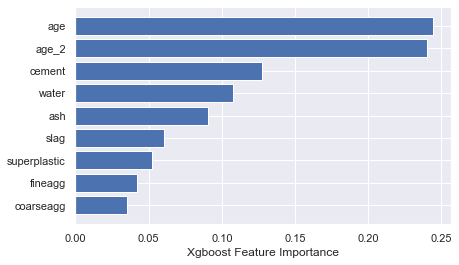

In [229]:
sorted_idx = xgb_model2.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xgb_model2.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


### Summary 

Using machine learning models, these have simulated the compressive strength of concrete using several combinations of ingredients and aging process.

Through EDA it was discovered that cement, age and superplasticizer have a positive impact on the overall strength. Water is found to have a negative impact, but is often present in older concrete due to the curing processes.

After utilising ensemble regression models insights into ingredients and use of water is beneficial in a business context.
The feature importance plot illustrates the importance of concrete strength is heavily affected by the age, cement, water and ash, and less on slag, superplastic, fineagg and coarseagg.

The results of gradient boosting and XGBoost has great scoring metrics and would all be suitable in a production environment for making further predictions and testing.

